In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns              
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings                    
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [0]:
retention = pd.read_csv("/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [0]:
retention.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [0]:
retention.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


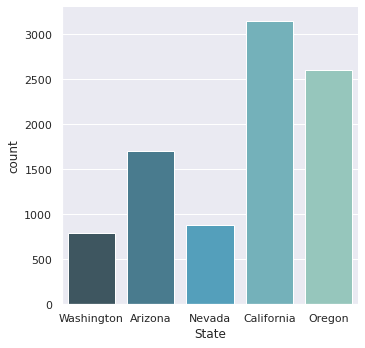

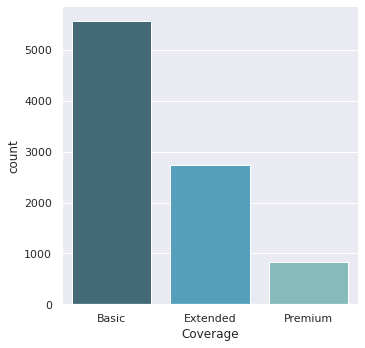

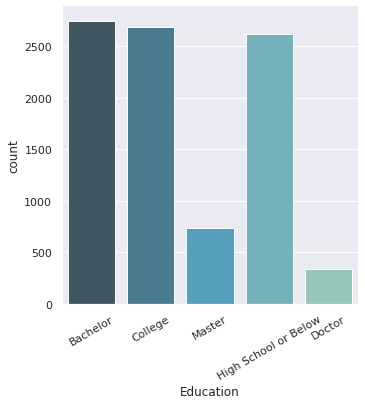

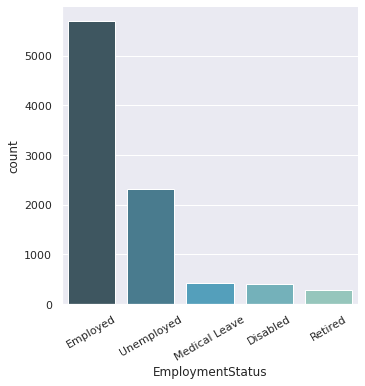

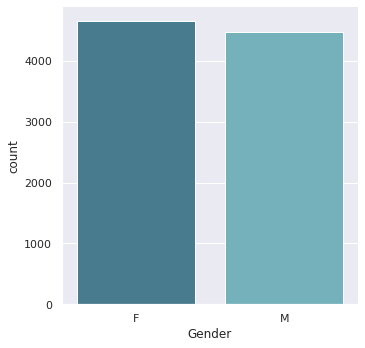

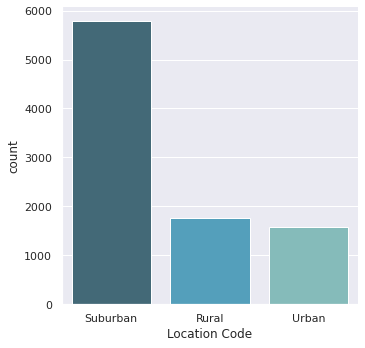

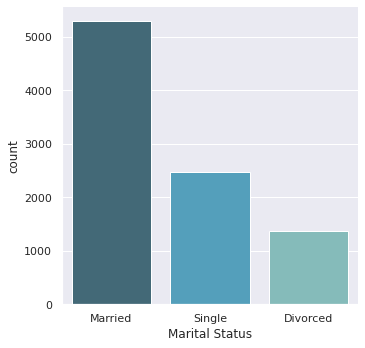

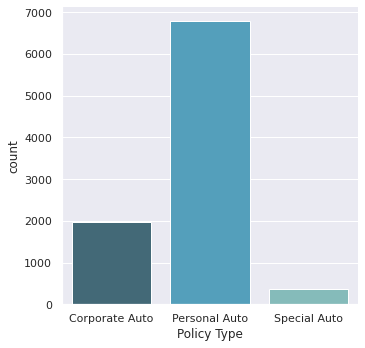

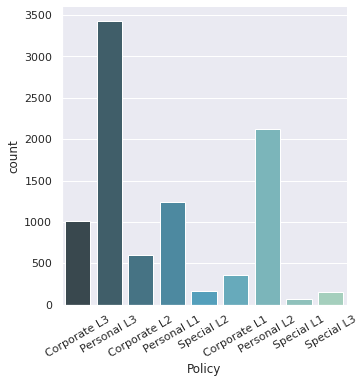

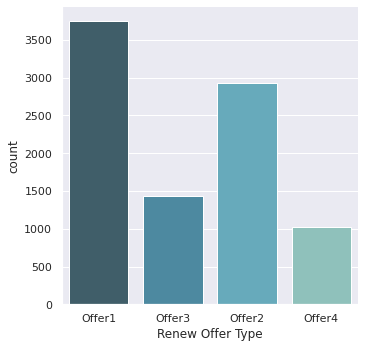

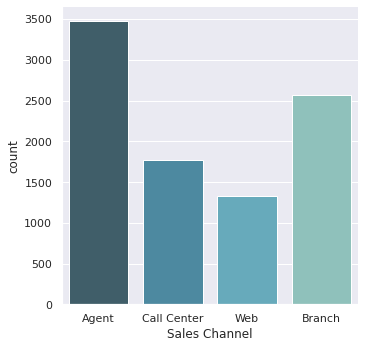

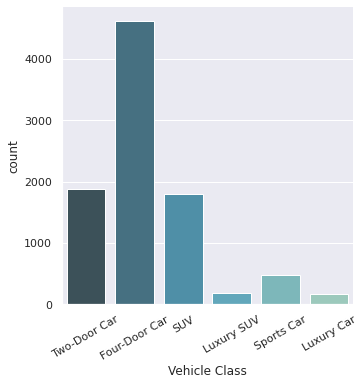

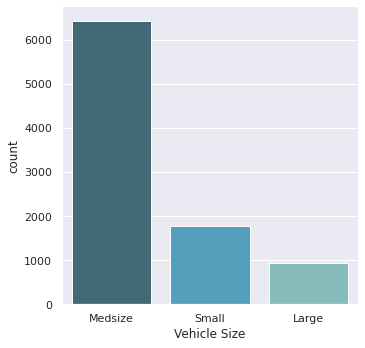

In [0]:
sns.catplot(x="State", kind="count", palette="GnBu_d", data=retention, ax = ax1)
sns.catplot(x="Coverage", kind="count", palette="GnBu_d", data=retention, ax = ax2)
grid = sns.catplot(x="Education", kind="count", palette="GnBu_d", data=retention)
grid.set_xticklabels(rotation=30)
grid = sns.catplot(x="EmploymentStatus", kind="count", palette="GnBu_d", data=retention)
grid.set_xticklabels(rotation=30)
sns.catplot(x="Gender", kind="count", palette="GnBu_d", data=retention)
sns.catplot(x="Location Code", kind="count", palette="GnBu_d", data=retention)
sns.catplot(x="Marital Status", kind="count", palette="GnBu_d", data=retention)
sns.catplot(x="Policy Type", kind="count", palette="GnBu_d", data=retention)
grid = sns.catplot(x="Policy", kind="count", palette="GnBu_d", data=retention)
grid.set_xticklabels(rotation=30)
sns.catplot(x="Renew Offer Type", kind="count", palette="GnBu_d", data=retention)
sns.catplot(x="Sales Channel", kind="count", palette="GnBu_d", data=retention)
grid = sns.catplot(x="Vehicle Class", kind="count", palette="GnBu_d", data=retention)
grid.set_xticklabels(rotation=30)
sns.catplot(x="Vehicle Size", kind="count", palette="GnBu_d", data=retention)

In [0]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / retention.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

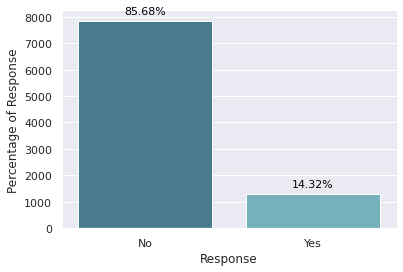

In [0]:
plot = sns.countplot(x="Response", palette="GnBu_d", data=retention)
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

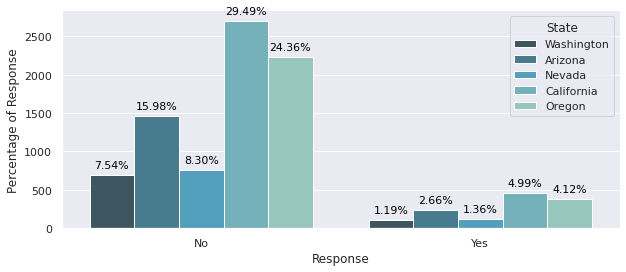

In [0]:
plt.figure(figsize=(10,4))
plot = sns.countplot('Response', hue = 'State',data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

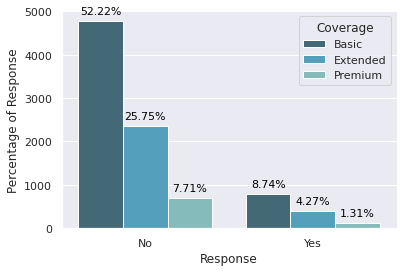

In [0]:
plot = sns.countplot('Response', hue = 'Coverage',data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

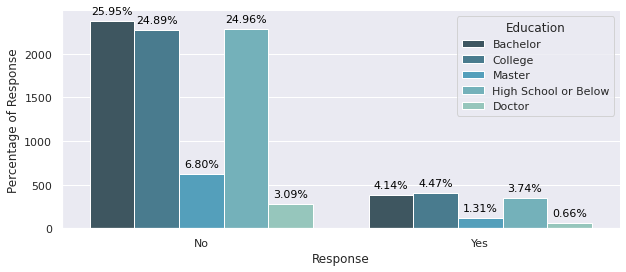

In [0]:
plt.figure(figsize=(10,4))
plot = sns.countplot('Response',hue = 'Education' ,data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

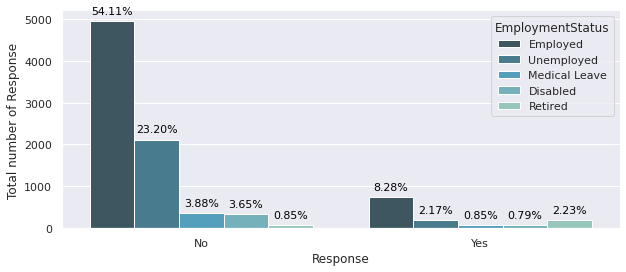

In [0]:
plt.figure(figsize=(10,4))
plot = sns.countplot('Response',hue = 'EmploymentStatus' ,data = retention,  palette="GnBu_d")
plt.ylabel('Total number of Response')
annot_plot(plot, 0.08,1)

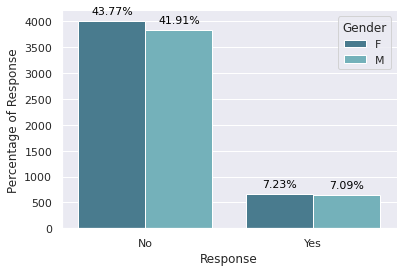

In [0]:
plot = sns.countplot('Response', hue = 'Gender',data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

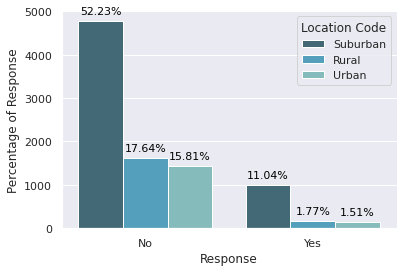

In [0]:
plot = sns.countplot('Response', hue = 'Location Code',data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

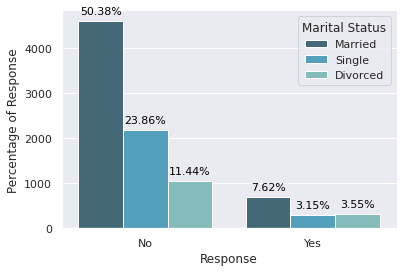

In [0]:
#plt.figure(figsize=(12,6))
plot = sns.countplot('Response', hue = 'Marital Status', data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot,0.08,1)

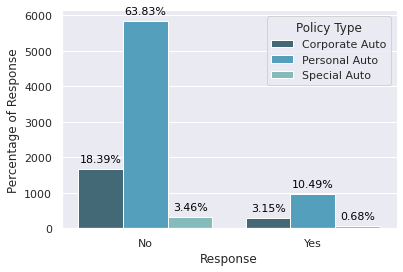

In [0]:
plot = sns.countplot('Response', hue = 'Policy Type',data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

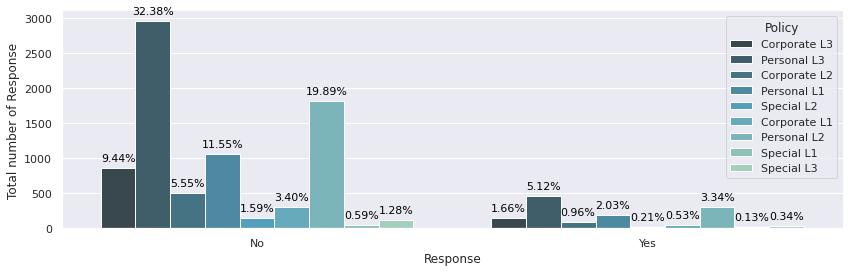

In [0]:
plt.figure(figsize=(14,4))
plot = sns.countplot('Response',hue = 'Policy' ,data = retention,  palette="GnBu_d")
plt.ylabel('Total number of Response')
annot_plot(plot, 0.08,1)

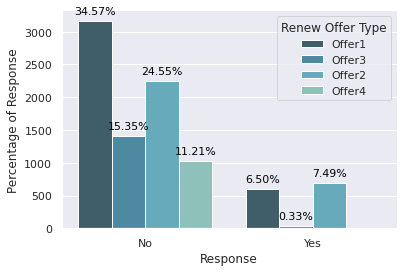

In [0]:
plot = sns.countplot('Response',hue = 'Renew Offer Type' ,data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)
plt.show()

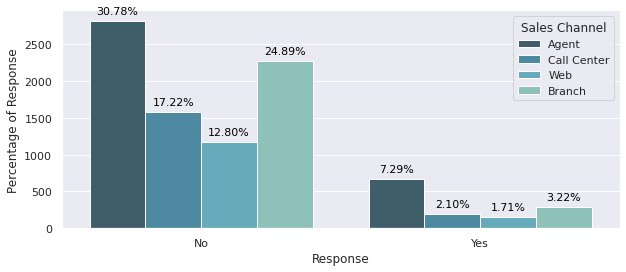

In [0]:
plt.figure(figsize=(10,4))
plot = sns.countplot('Response',hue = 'Sales Channel' ,data = retention, palette="GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

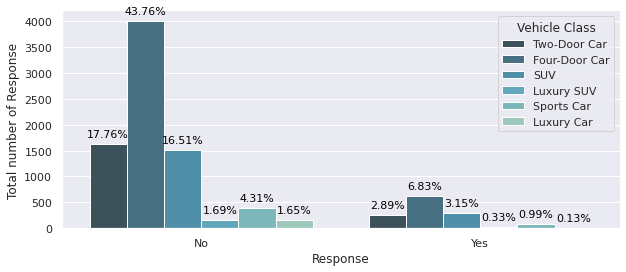

In [0]:
plt.figure(figsize=(10,4))
plot = sns.countplot('Response',hue = 'Vehicle Class' ,data = retention,  palette="GnBu_d")
plt.ylabel('Total number of Response')
annot_plot(plot, 0.08,1)

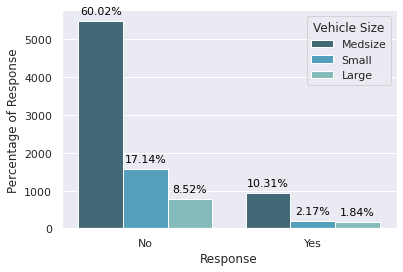

In [0]:
plot = sns.countplot('Response', hue = 'Vehicle Size',data = retention, palette = "GnBu_d")
plt.ylabel('Percentage of Response')
annot_plot(plot, 0.08,1)

Text(0, 0.5, 'Customer Lifetime Value')

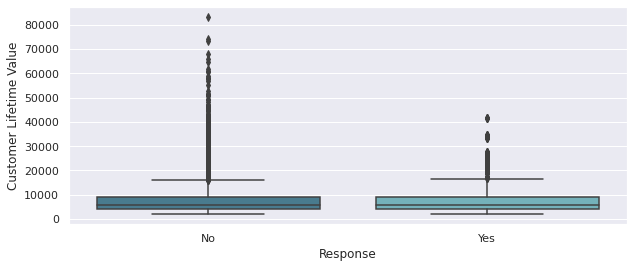

In [0]:
plt.figure(figsize=(10,4))
sns.boxplot(y = 'Customer Lifetime Value' , x = 'Response', data = retention, palette = "GnBu_d")
plt.ylabel('Customer Lifetime Value')

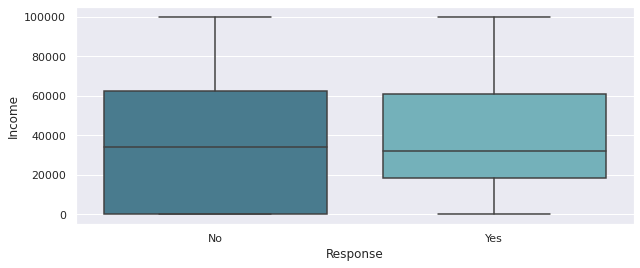

In [0]:
plt.figure(figsize=(10,4))
sns.boxplot(y = 'Income' , x = 'Response', data = retention, palette = "GnBu_d")
plt.show()

Text(0, 0.5, 'Monthly Premium Auto')

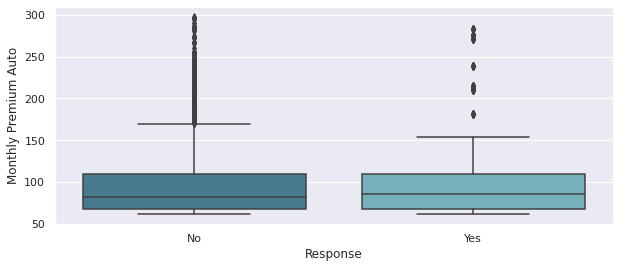

In [0]:
plt.figure(figsize=(10,4))
sns.boxplot(y = 'Monthly Premium Auto' , x = 'Response', data = retention, palette = "GnBu_d")
plt.ylabel('Monthly Premium Auto')

Text(0, 0.5, 'Months Since Last Claimt')

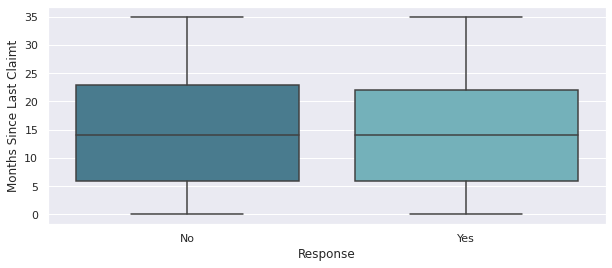

In [0]:
plt.figure(figsize=(10,4))
sns.boxplot(y = 'Months Since Last Claim' , x = 'Response', data = retention, palette = "GnBu_d")
plt.ylabel('Months Since Last Claimt')

Text(0, 0.5, 'Months Since Policy Inception')

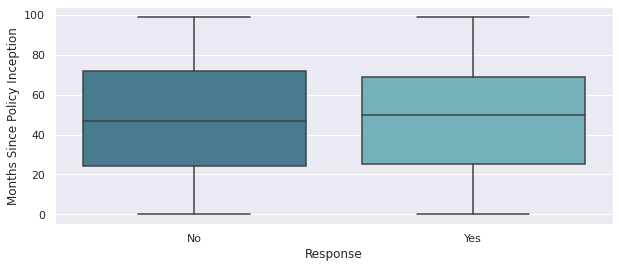

In [0]:
plt.figure(figsize=(10,4))
sns.boxplot(y = 'Months Since Policy Inception' , x = 'Response', data = retention, palette = "GnBu_d")
plt.ylabel('Months Since Policy Inception')

Text(0, 0.5, 'Number of Policies')

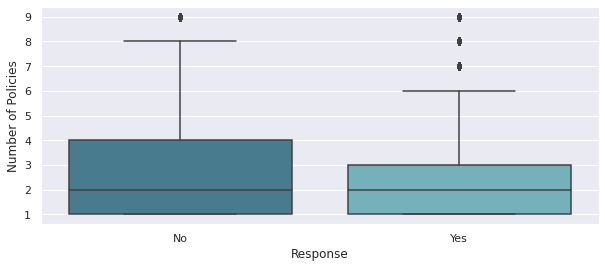

In [0]:
plt.figure(figsize=(10,4))
sns.boxplot(y = 'Number of Policies' , x = 'Response', data = retention, palette = "GnBu_d")
plt.ylabel('Number of Policies')

Text(0, 0.5, 'Total Claim Amount')

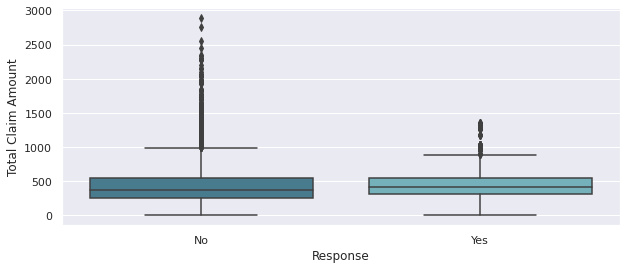

In [0]:
plt.figure(figsize=(10,4))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = retention, palette = "GnBu_d")
plt.ylabel('Total Claim Amount')

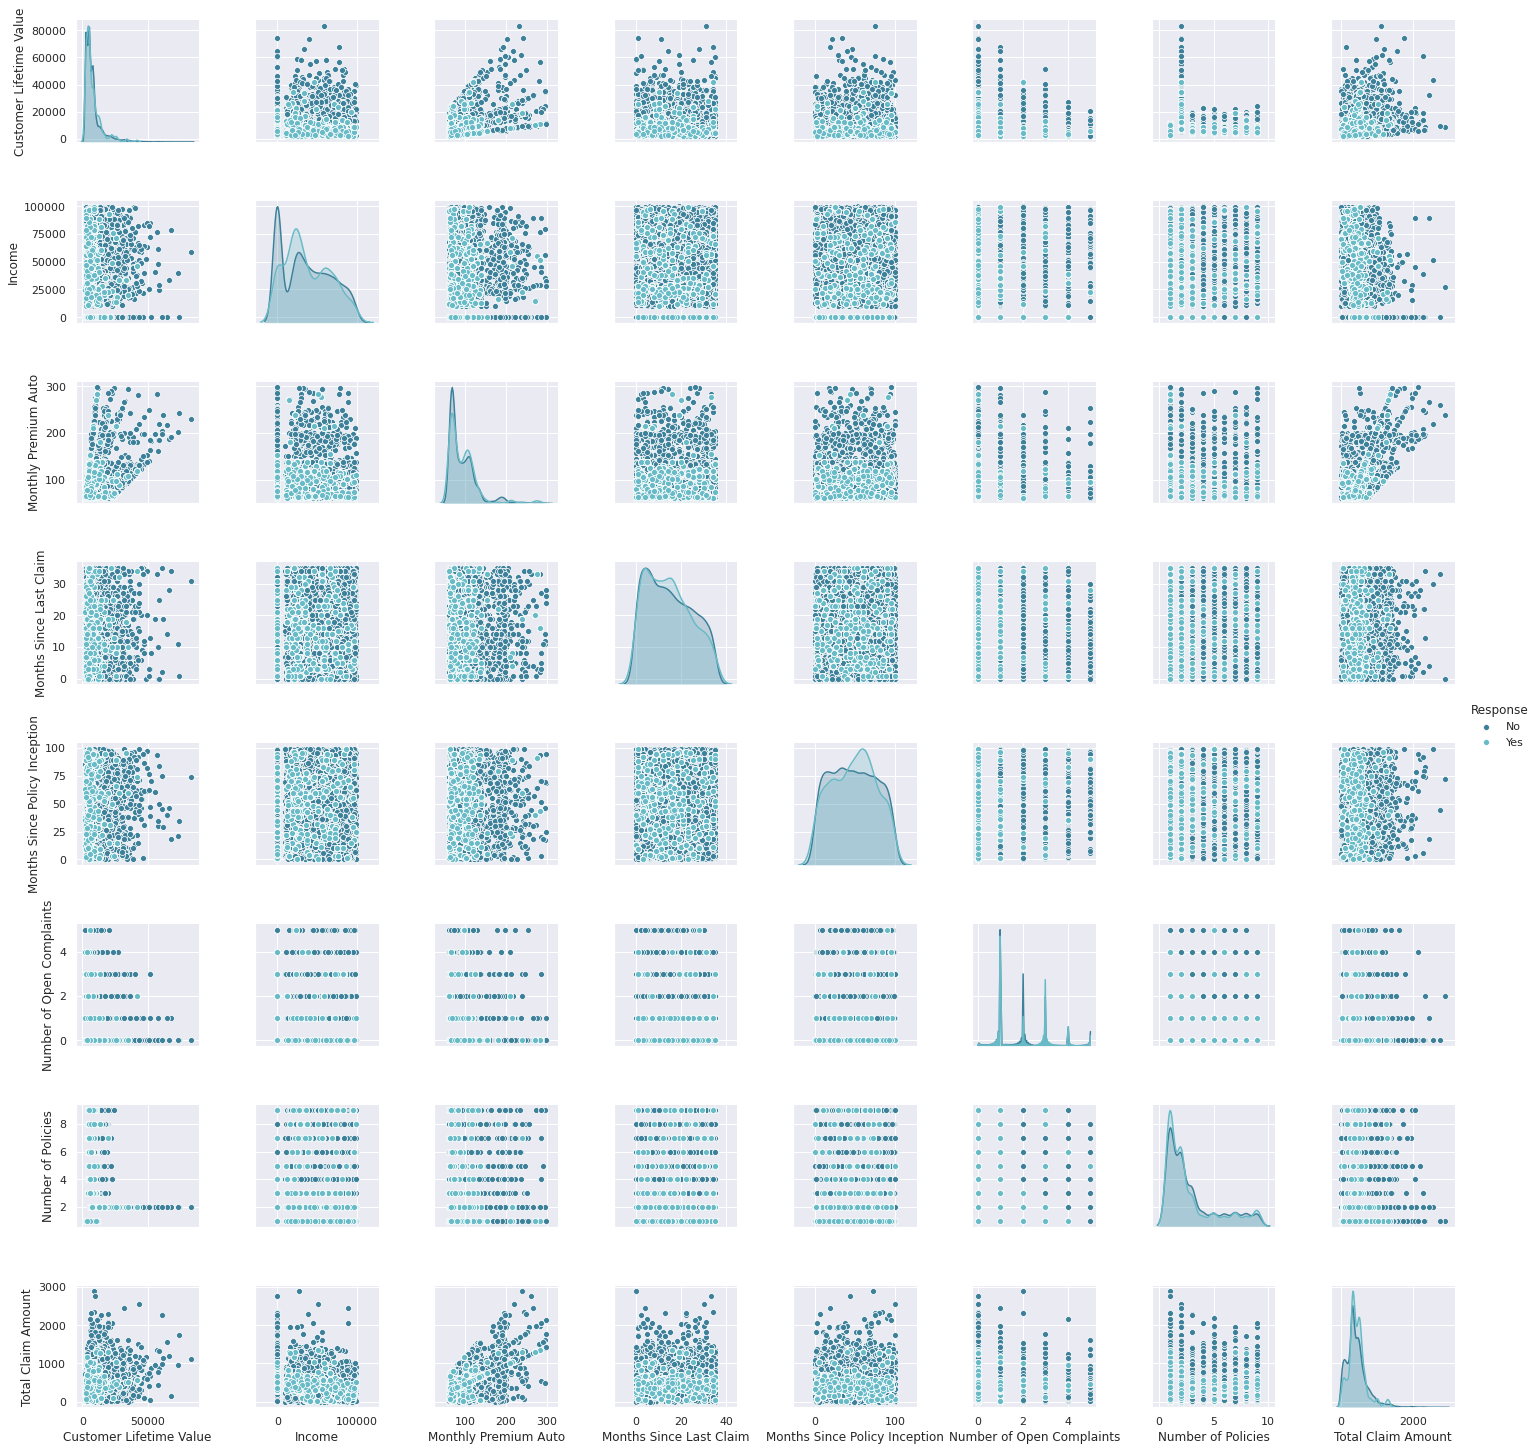

In [0]:
sns.pairplot(retention, kind="scatter", hue="Response", palette="GnBu_d")


In [0]:
cmap = sns.choose_colorbrewer_palette("sequential", as_cmap=True)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

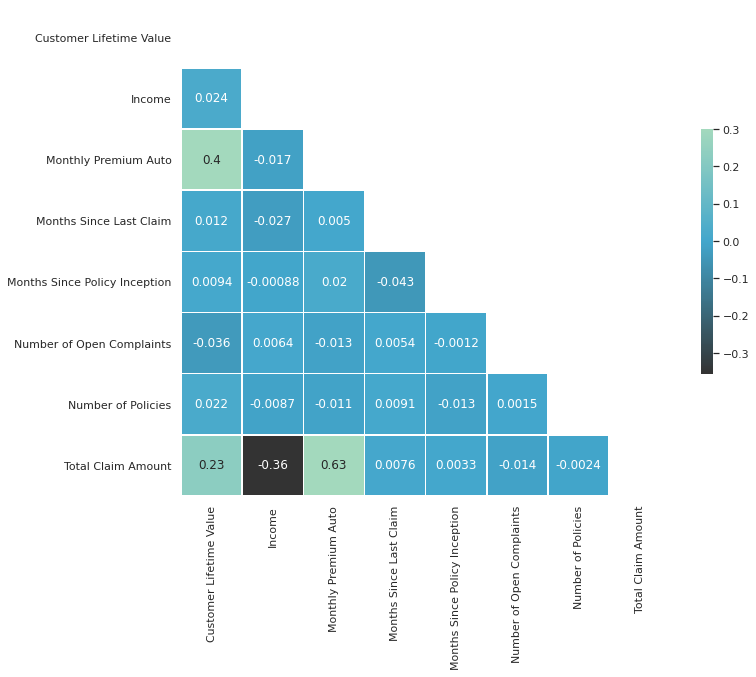

In [0]:
sns.set(style="white")

# Compute the correlation matrix
corr = retention.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)